In [ ]:
!wget https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/refs/heads/main/data/train.csv

--2025-02-06 13:13:59--  https://raw.githubusercontent.com/vardhan-siramdasu/Kaggle-Digit-Recognizer/refs/heads/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76733040 (73M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.18M   245MB/s    in 0.3s    

2025-02-06 13:14:01 (245 MB/s) - ‘train.csv’ saved [76733040/76733040]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42) # random seed is being uesd for whenever we rerun the cell or notebook we can get the same results
train_data = pd.read_csv('/content/train.csv') # path to the train dataset
train_data = np.array(train_data) # here we need to convert the data into array
test_data = pd.read_csv('/content/test.csv') # path to the test dataset
test_data = np.array(test_data) # here we need to convert the data into array
test_data = test_data/255.0 # normalizing the test data
m, n = train_data.shape # here m is number of training examples and n is number of features in our case dimension of array
np.random.shuffle(train_data) # shuffling data

print(f"Number of training instances: {m}\nNumber of features of a single training instance: {n}")

Number of training instances: 42000
Number of features of a single training instance: 785


6
(784,)


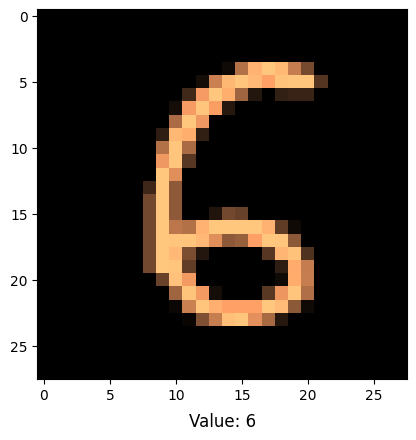

In [71]:
# a little bit of visualization
sample_data = train_data[5] # fifth element of the data array
label = sample_data[0]
print(label) # label of the sample_data, first element of the array is label of the image so it's not one of the pixel of image

sample_data = train_data[5][1:] # thus, we take into count after first elemnt of the array
print(sample_data.shape)

sample_data = sample_data.reshape((28, 28)) # here we reshaping the image for visulaization
plt.imshow(sample_data, cmap='copper') # visual of sample
plt.title(f"Value: {label}", y=-0.15,color="#000")
plt.show() # this is kust for random text not to show up

In [ ]:
data_train = train_data[1000:]  # we separated from row 1000 till end of the dataset as training samples
X_train = data_train[:, 1:] / 255.  # Remaining columns are features
Y_train = data_train[:, 0]  # First column of all rows are labels for corresponding row

data_dev = train_data[:1000]  # First 1000 rows for dev set
X_dev = data_dev[:, 1:] / 255.  # Remaining columns are features
Y_dev = data_dev[:, 0]  # First column of all rows are labels for corresponding row

(28000, 784)


##### At the picture below it shows basic neural network representation

##### As we can see it has 1 hidden layer with input and output layers

##### We can see that how parameters took shape.

##### For $W^{[1]}$ it took the shape of (number of neurons in current layer, number of incoming features) but for $b^{[1]}$ it took shape of (number of neurons in current layer, 1). Because it provides an offset for each of the $m$ neurons in the current layer.

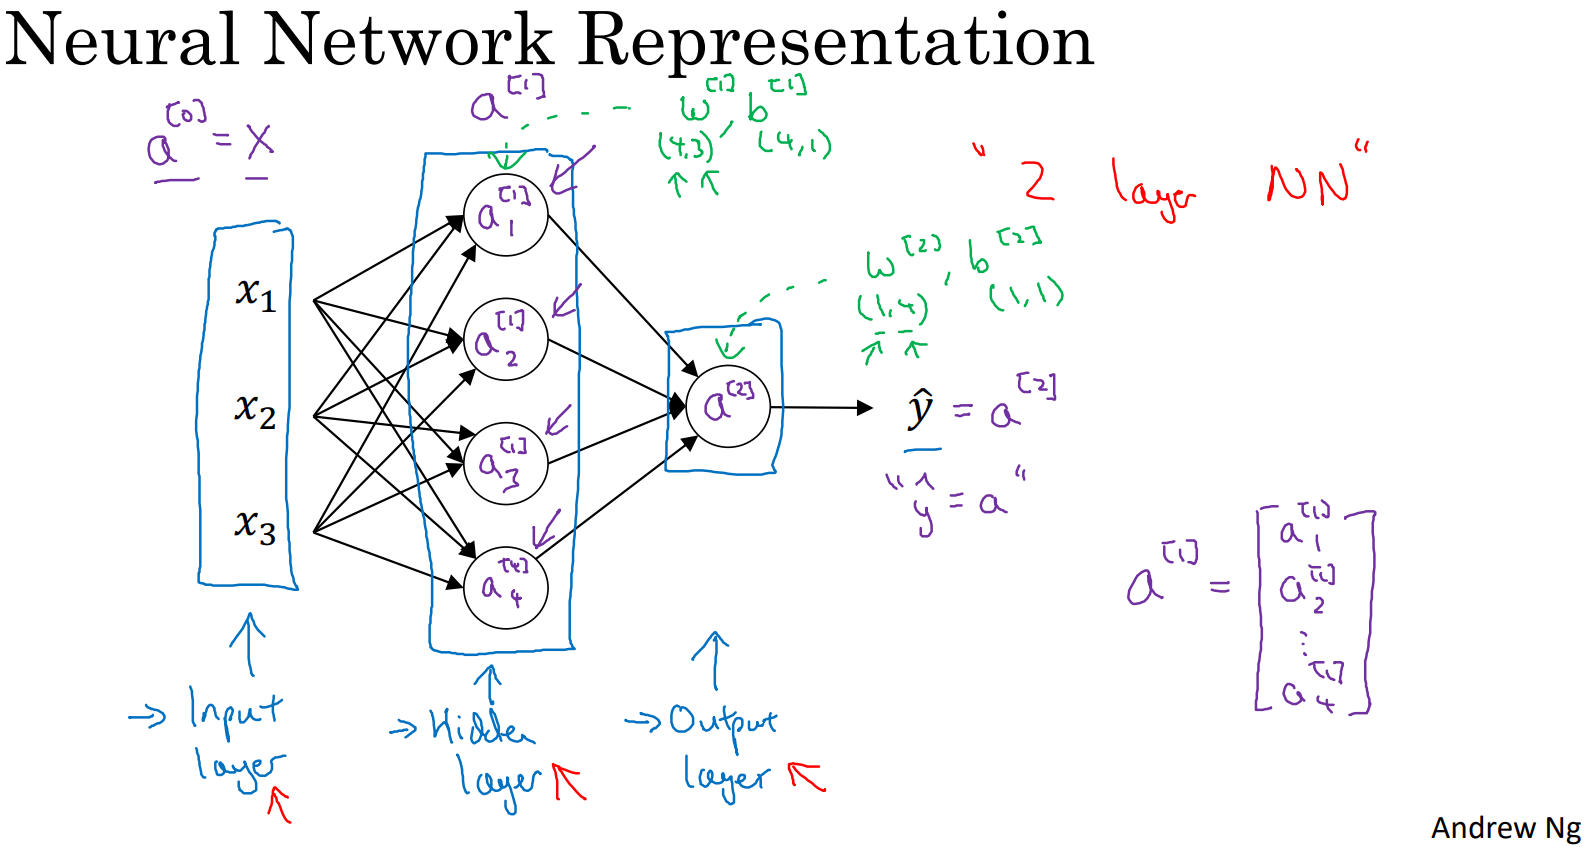

### Neural Network

#### Our NN will have a simple two-layer architecture
- #### Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image.
- #### A hidden layer  $a^{[1]}$ will have 10 units with ReLU activation,
- #### and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

### Forward Prop

\begin{align*}
Z^{[1]} &= W^{[1]} X + b^{[1]}\\
A^{[1]} &= g_{ReLU}(Z^{[1]})\\
Z^{[2]} &= W^{[2]} A^{[1]} + b^{[2]}\\
A^{[2]} &= g_{softmax}(Z^{[2]})\\
\end{align*}


### Backward Prop

\begin{align*}
dZ^{[2]} &= A^{[2]} - Y \\
dW^{[2]} &= \frac{1}{m} dZ^{[2]} A^{[1]T} \\
dB^{[2]} &= \frac{1}{m} \sum dZ^{[2]} \\
dZ^{[1]} &= W^{[2]T} dZ^{[2]} .* g^{[1]'}(z^{[1]}) \\
dW^{[1]} &= \frac{1}{m} dZ^{[1]} A^{[0]T} \\
dB^{[1]} &= \frac{1}{m} \sum dZ^{[1]}
\end{align*}

### Gradient descent

\begin{align*}
W^{[2]} &:= W^{[2]} - \alpha dW^{[2]}\\
b^{[2]} &:= b^{[2]} - \alpha b^{[2]}\\
W^{[1]} &:= W^{[1]} - \alpha dW^{[1]}\\
b^{[1]} &:= b^{[1]} - \alpha b^{[1]}\\
\end{align*}

In [ ]:
def init_params():
    # here I choose to apply He initialization to W. Since we're using ReLU we choose sqrt(2). You can check for more here https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_normal_
    W1 = np.random.rand(10, 784)*np.sqrt(2 / 784)
    b1 = np.random.rand(10, 1)*0.01
    W2 = np.random.rand(10, 10)*np.sqrt(2 / 784)
    b2 = np.random.rand(10, 1)*0.01
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0) # here np.maximum is used because np.max returns a scalar while np.maximum return sequence

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) # for numerical stability we subtracted maximum value of array from each element
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True) # softmax function

# forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# during backward pass we'll need derivative of relu
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((Y.size, num_classes)) # here we applied one_hot encoding
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[0]
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0) # getting index of maximum value of the array

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 8 8 ... 8 8 8] [2 6 4 ... 2 6 0]
0.09717073170731708
Iteration:  10
[0 0 0 ... 0 0 0] [2 6 4 ... 2 6 0]
0.09839024390243903
Iteration:  20
[0 0 0 ... 0 0 0] [2 6 4 ... 2 6 0]
0.09841463414634147
Iteration:  30
[0 0 0 ... 0 0 0] [2 6 4 ... 2 6 0]
0.10165853658536585
Iteration:  40
[0 0 0 ... 0 0 0] [2 6 4 ... 2 6 0]
0.159
Iteration:  50
[2 0 8 ... 2 0 0] [2 6 4 ... 2 6 0]
0.3530243902439024
Iteration:  60
[2 6 9 ... 2 6 0] [2 6 4 ... 2 6 0]
0.5434878048780488
Iteration:  70
[2 6 9 ... 2 6 0] [2 6 4 ... 2 6 0]
0.6164390243902439
Iteration:  80
[2 6 9 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6511951219512195
Iteration:  90
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.6832926829268293
Iteration:  100
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7099024390243902
Iteration:  110
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7328536585365854
Iteration:  120
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.750390243902439
Iteration:  130
[2 6 4 ... 4 6 0] [2 6 4 ... 2 6 0]
0.7670975609756098
Iteration:  140
[2 6 4 ... 

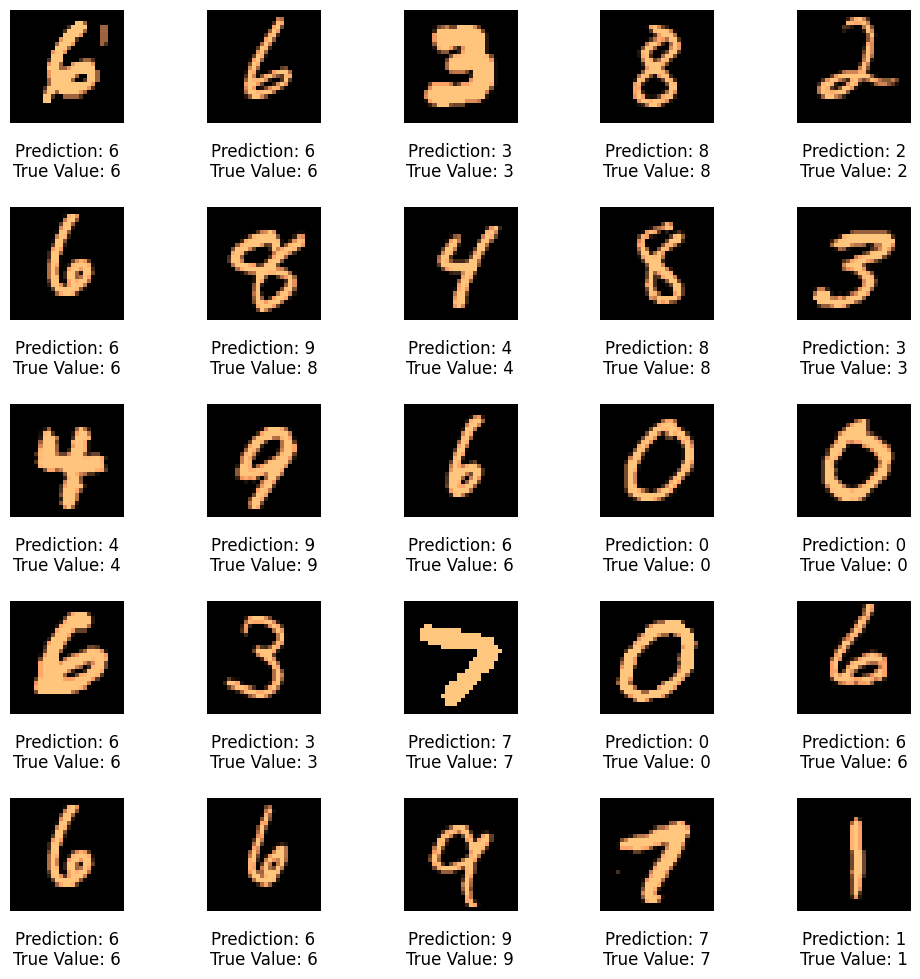

In [67]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X.T)
    predictions = get_predictions(A2)
    return predictions

def show_predictions(W1=W1, b1=b1, W2=W2, b2=b2, rows=5, cols=5):
  fig = plt.figure(figsize=(2*rows, 2*cols))
  for i in range(rows*cols):
    samp = np.random.choice(X_dev.shape[0])
    fig.add_subplot(rows,cols,i+1)
    img = X_dev[samp]
    img = img.reshape((28,28))
    pred = make_predictions(X_dev[samp, :, None], W1, b1, W2, b2)
    plt.imshow(img, cmap='copper')
    plt.axis("off")
    plt.title(f"Prediction: {pred[0]}\nTrue Value: {Y_dev[samp]}", y=-0.55,color="#000")

  fig.tight_layout()
  fig.show()

show_predictions()